In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer

In [2]:
# load the breast cancer dataset from sklearn
data = load_breast_cancer()

In [3]:
# print description of dataset

print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [4]:
# create a dataframe with the independent variables
df = pd.DataFrame(data.data, columns=data.feature_names)

# add the target
df['target'] = data.target

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [5]:
# Difference between 2 features - method 1

df['difference'] = df['worst compactness'].sub(df['mean compactness'])

df['difference'].head()

0    0.38800
1    0.10796
2    0.26460
3    0.58240
4    0.07220
Name: difference, dtype: float64

In [6]:
# Difference between 2 features - method 2

df['difference'] = df['worst compactness'] - (df['mean compactness'])

df['difference'].head()

0    0.38800
1    0.10796
2    0.26460
3    0.58240
4    0.07220
Name: difference, dtype: float64

Text(0.5, 1.0, 'Added Features')

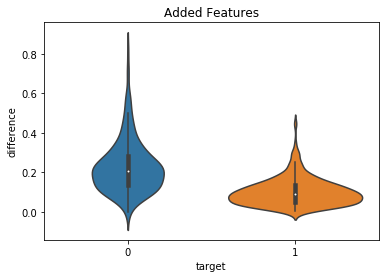

In [7]:
# violin plot of the substraction

sns.violinplot(x="target", y="difference", data=df)
plt.title('Added Features')

In [8]:
# Quotient of features - method 1

df['quotient'] = df['worst radius'].div(df['mean radius'])

df['quotient'].head()

0    1.410784
1    1.214876
2    1.197054
3    1.305604
4    1.110892
Name: quotient, dtype: float64

In [9]:
# Quotient of features - method 2

df['quotient'] = df['worst radius'] / (df['mean radius'])
df['quotient'].head()

0    1.410784
1    1.214876
2    1.197054
3    1.305604
4    1.110892
Name: quotient, dtype: float64

Text(0.5, 1.0, 'Quotient of Features')

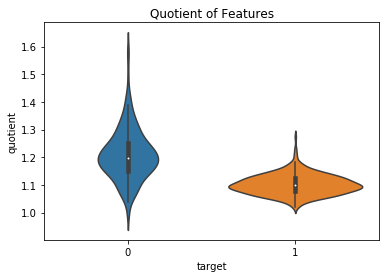

In [10]:
# violin plot with quotient

sns.violinplot(x="target", y="quotient", data=df)
plt.title('Quotient of Features')

In [11]:
# features of interest
features = ['mean smoothness', 'mean compactness', 'mean concavity',
               'mean concave points', 'mean symmetry']

# features to aggregate
worst_f = ['worst smoothness', 'worst compactness', 'worst concavity',
               'worst concave points', 'worst symmetry']

In [12]:
# create new feature by sum of the worst features
df['worst'] = df[worst_f].sum(axis=1)

df['worst'].head()

0    2.2652
1    1.0130
2    1.6236
3    2.6843
4    1.1413
Name: worst, dtype: float64

In [13]:
df[features+['worst']].head()

,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,worst
0,0.11840,0.27760,0.3001,0.14710,0.2419,2.2652
1,0.08474,0.07864,0.0869,0.07017,0.1812,1.0130
2,0.10960,0.15990,0.1974,0.12790,0.2069,1.6236
3,0.14250,0.28390,0.2414,0.10520,0.2597,2.6843
4,0.10030,0.13280,0.1980,0.10430,0.1809,1.1413


In [14]:
# calculate the ratio of mutliple features vs the worst feature we created
# in previous cells
df[features] = df[features].div(df['worst'], axis=0)

df[features].head()

,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry
0,0.052269,0.122550,0.132483,0.064939,0.106790
1,0.083653,0.077631,0.085785,0.069269,0.178875
2,0.067504,0.098485,0.121582,0.078776,0.127433
3,0.053086,0.105763,0.089930,0.039191,0.096748
4,0.087882,0.116359,0.173486,0.091387,0.158503


In [15]:
# https://pandas.pydata.org/pandas-docs/stable/reference/frame.html#binary-operator-functions